# WORLD HAPPINESS INSIGHTS 2024

## Introduction

* The World Happiness Report is a landmark survey of the state of global happiness.
* The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
* Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.
* The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

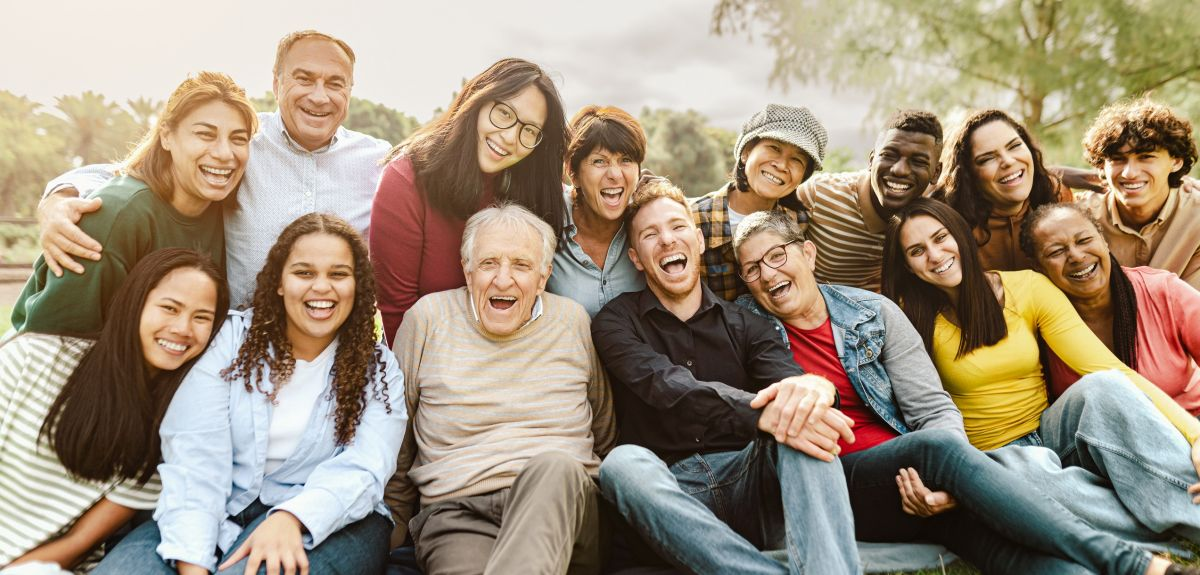

## What will you learn from this project?

* **Global Happiness Dynamics**: Understanding how various factors like GDP, social support, and freedom influence happiness across different countries and regions.

* **Data Visualization Techniques**: Gaining insights through advanced visualization methods like scatter plots, heatmaps, and animated graphs.

* **Correlation Analysis**: Learning how to identify and interpret the relationships between different socio-economic indicators.

* **Regional Comparisons**: Exploring the differences in happiness and well-being metrics between regions and their underlying causes.

* **Data Cleaning and Preparation**: Practical skills in managing and preparing data for analysis, including filtering and handling missing values.

## Content
​
Here's a brief explanation of each column in the dataset:
​
​
* **Country name:** 
This column contains the name of the country represented in each row. Each row in the dataset represents the happiness metrics and related data for a specific country.
​
* **Regional indicator:**
This column indicates the geographic or political region to which each country belongs. For example, "Western Europe" or "Middle East and North Africa" specifies the region of the country. This can be used to analyze regional differences in happiness levels.
​
* **Ladder score:** 
This column represents a scale (typically ranging from 0 to 10) that measures how satisfied people are with their lives. A score of 10 indicates the highest satisfaction, while a score of 0 indicates the lowest. This measurement is a subjective well-being indicator reflecting how people perceive their overall happiness.
​
* **upperwhisker:**
This column represents the upper bound of the confidence interval for the "Ladder score." The confidence interval provides a statistical range that is likely to contain the true value of the Ladder score. The upper whisker indicates the possible maximum value.
​
* **lowerwhisker:**
This column represents the lower bound of the confidence interval for the "Ladder score." The lower whisker indicates the possible minimum value.
​
* **Log GDP per capita:**
This column contains the logarithm of the Gross Domestic Product (GDP) per capita of each country. GDP per capita is a common indicator used to measure the economic size and prosperity of a country. The logarithmic transformation helps to reduce the impact of extreme values and provides a more balanced analysis.
​
* **Social support:**
This column measures the extent to which individuals have a reliable social support network they can count on in times of need. Typically, this value ranges from 0 to 1, with 1 indicating the highest level of social support. Social support refers to the availability of family, friends, or community support, which can have a significant impact on well-being.
​
* **Healthy life expectancy:**
This column represents the expected number of years a person can live in good health from birth. It reflects the average number of years a person is expected to live without major health issues. A higher healthy life expectancy suggests a higher overall health level within a population.
​
* **Freedom to make life choices:**
This column measures the extent to which individuals feel free to make choices about their lives. The value typically ranges from 0 to 1, with 1 indicating the highest level of freedom. This freedom reflects the ability of individuals to shape their lives according to their desires and the absence of restrictions imposed by the state or society.
​
* **Generosity:**
This column measures the level of generosity within a society, typically ranging from 0 to 1. Higher values indicate a higher level of generosity, which can include behaviors such as charitable donations, volunteer work, or other acts of kindness.
​
* **Perceptions of corruption:**
This column reflects the perceived level of corruption within a country. Values typically range from 0 to 1, with lower values indicating higher perceived corruption. High perceptions of corruption often indicate a lack of trust in public institutions and governance.
​
* **Dystopia + residual:**
This column represents the residual value calculated by comparing the happiness metrics in the dataset to a dystopian reference point. Dystopia represents a hypothetical scenario where happiness is at its lowest. The residual value indicates how much a country's overall happiness level differs from that of a dystopian country.

# Python Libraries:

In [2]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")  # or any other supported style like "darkgrid"


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv
/kaggle/input/country-population-from-1960-to-2022/cleaned_data_Task1.csv
/kaggle/input/world-population-by-country-2024/World Population by country 2024.csv


/tmp/ipykernel_33/1866395902.py:26: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [3]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding='latin1')

In [4]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [5]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [7]:
df2024=pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv",encoding='latin1')

In [8]:
df2024.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [9]:
df2024.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [10]:
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


## Data Distributions in 2024
* Unique Countries
* Count Regional Indicator
* Distribution of Remaining Features

In [11]:
#sorted unique country names horizontal
sorted_countries = sorted(df2024["Country name"].unique())
print(", ".join(sorted_countries))

Afghanistan, Albania, Algeria, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Belgium, Benin, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Cambodia, Cameroon, Canada, Chad, Chile, China, Colombia, Comoros, Congo (Brazzaville), Congo (Kinshasa), Costa Rica, Croatia, Cyprus, Czechia, Denmark, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Eswatini, Ethiopia, Finland, France, Gabon, Gambia, Georgia, Germany, Ghana, Greece, Guatemala, Guinea, Honduras, Hong Kong S.A.R. of China, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Israel, Italy, Ivory Coast, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kosovo, Kuwait, Kyrgyzstan, Laos, Latvia, Lebanon, Lesotho, Liberia, Libya, Lithuania, Luxembourg, Madagascar, Malawi, Malaysia, Mali, Malta, Mauritania, Mauritius, Mexico, Moldova, Mongolia, Montenegro, Morocco, Mozambique, Myanmar, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, Niger, Nigeria, North Macedonia, Norwa

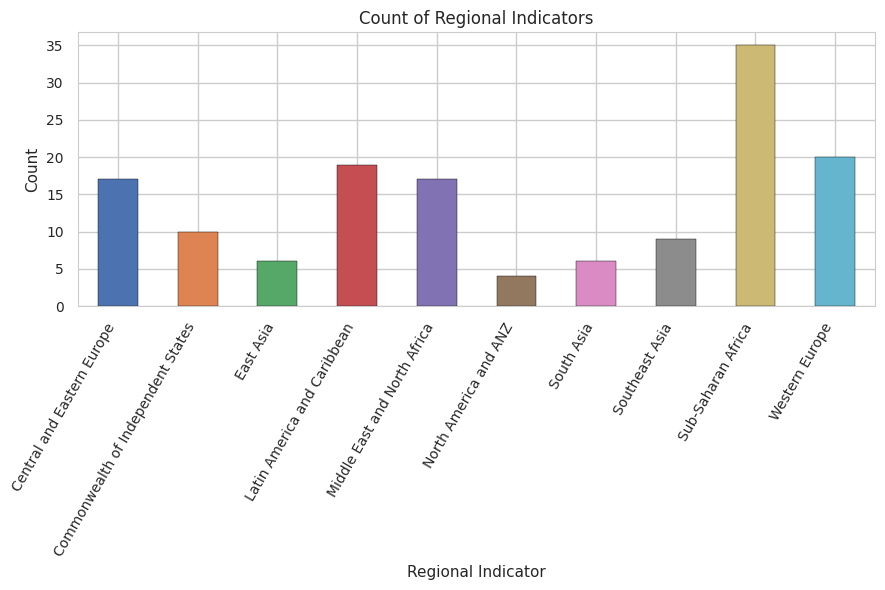

In [12]:

plt.figure(figsize=(9,6))  # Smaller figure size (width=8, height=4)

# Use a Seaborn color palette for more vibrant colors
colors = sns.color_palette("deep")

df2024["Regional indicator"].value_counts().sort_index().plot(kind='bar', color=colors, edgecolor='black')
# Count occurrences of each 'Regional indicator', sort them alphabetically, and plot as a bar chart

plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels by 60 degrees, align them to the right for better readability

plt.title('Count of Regional Indicators')  # Add a title to the chart

plt.xlabel('Regional Indicator')  # Label the x-axis

plt.ylabel('Count')  # Label the y-axis

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()  # Display the plot

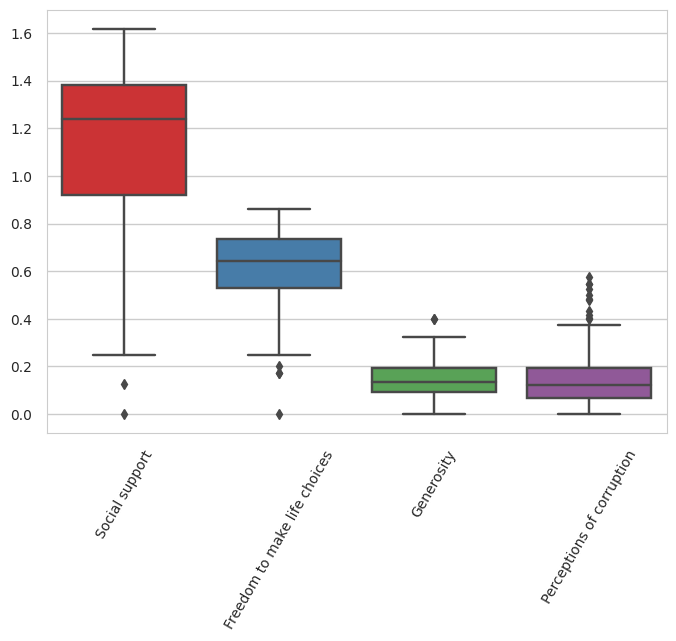

In [13]:
# distribution of feature set 1

list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

# Create the boxplot
sns.boxplot(data = df2024.loc[:, list_features], orient='v', palette = "Set1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()


### Insights:

**Social support** and **Freedom to make life choices** exhibit higher median values compared to **Generosity** and **Perceptions of corruption**, indicating they may be more positively perceived across the countries analyzed. The presence of outliers, particularly in corruption perception, highlights substantial variation in these aspects across different countries.

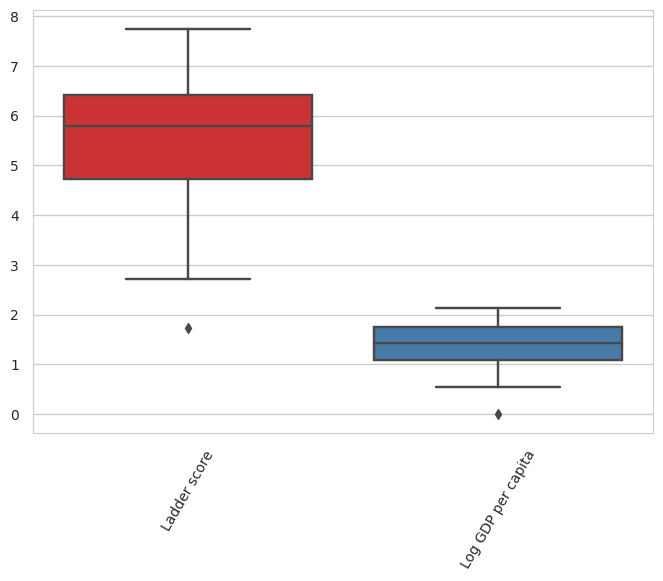

In [14]:
# distribution of feature set 2

list_features = ["Ladder score", "Log GDP per capita"]

# Create the boxplot
sns.boxplot(data = df2024.loc[:, list_features], orient='v', palette = "Set1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()


### Insights:

While both features show some variability, **Ladder score** has a wider range, reflecting greater diversity in life satisfaction across countries, whereas **Log GDP per capita** shows a tighter distribution, with fewer extreme outliers.

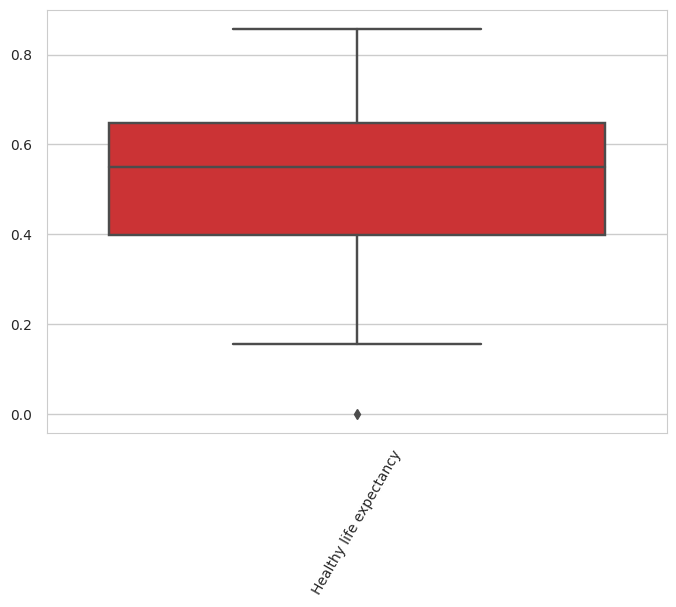

In [15]:
# distribution of feature set 3

list_features = ["Healthy life expectancy"]

# Create the boxplot
sns.boxplot(data = df2024.loc[:, list_features], orient='v', palette = "Set1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()

### Insights:

The distribution indicates that most countries have a fairly consistent and moderate to high level of healthy life expectancy, with few significant deviations. The outlier near the bottom suggests that in some places, **healthy life expectancy** is dramatically lower, which could be due to various factors such as poor healthcare, economic instability, or other socio-political issues.

## Happiest and Unhappiest Countries in 2024

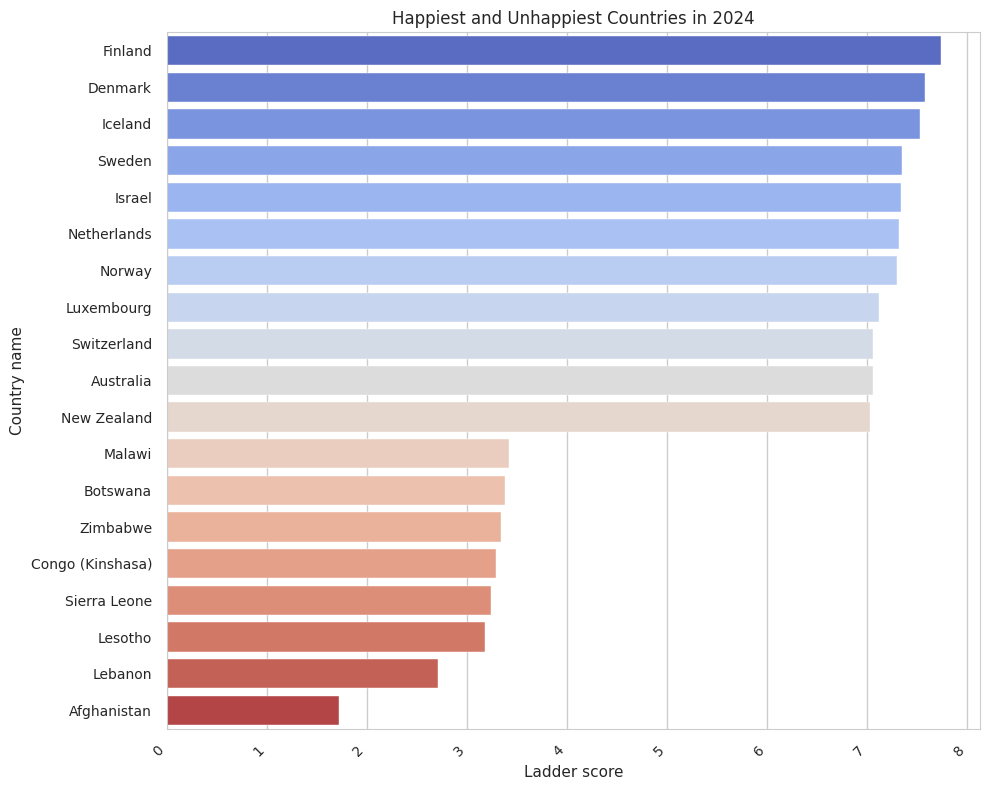

In [16]:
# Filter the happiest and unhappiest countries based on Ladder score thresholds
df2024_happiest_unhappiest = df2024[(df2024["Ladder score"] > 7) | (df2024["Ladder score"] < 3.5)]

# Create the barplot
plt.figure(figsize=(10,8))  # Adjusting the figure size for better readability
sns.barplot(x="Ladder score", y="Country name", data=df2024_happiest_unhappiest, palette="coolwarm")

# Add the title
plt.title("Happiest and Unhappiest Countries in 2024")

# Rotate the x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


### Insights:

* **Happiest Countries**: Finland, Denmark, and Iceland top the list, with Ladder scores above 7.2.
* **Unhappiest Countries**: Afghanistan and Lebanon are at the bottom, with Ladder scores below 3.

The color gradient from blue (happiest) to red (unhappiest) effectively highlights the significant disparity in happiness levels across these countries.

# Generous Distribution by Regional Indicator in 2024

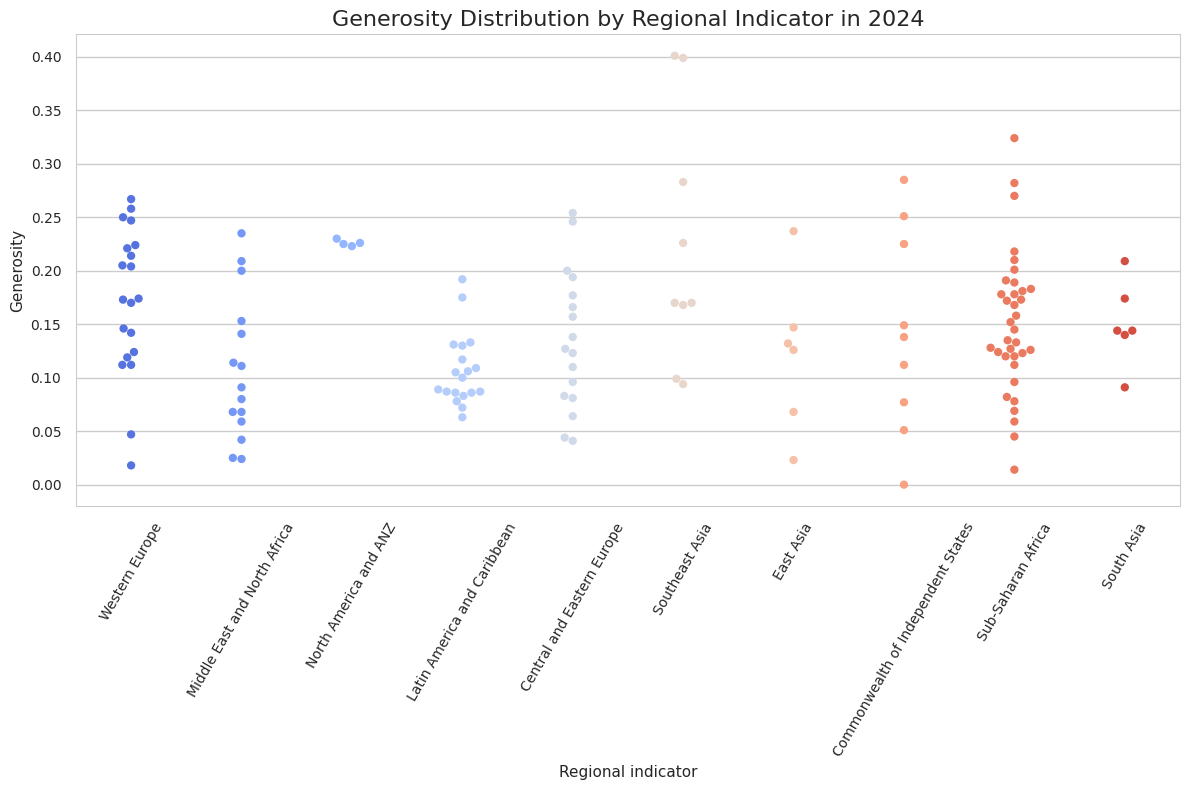

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Regional indicator' with the correct column name if needed
plt.figure(figsize=(12,8))  # Adjust the figure size for better readability
sns.swarmplot(x="Regional indicator", y="Generosity", data=df2024, palette="coolwarm", size=6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Add the title
plt.title("Generosity Distribution by Regional Indicator in 2024", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### Insights:

* **Color Gradient:** The color gradient from blue to red helps distinguish between regions with higher and lower generosity scores. Western Europe, for example, is predominantly blue, indicating higher generosity, while Sub-Saharan Africa shows more red, indicating lower generosity on average.
* **Regional Comparison:** The plot effectively illustrates the regional differences in generosity, highlighting how some regions have more variability within them, while others are more consistent.

This plot is useful for identifying not only the levels of generosity across different regions but also the variability within each region, providing a comprehensive view of global generosity in 2024.

In [18]:
df_pop=pd.read_csv("/kaggle/input/country-population-from-1960-to-2022/cleaned_data_Task1.csv")

In [19]:
df_pop.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [20]:


# melt df_pop 
df_popsum = pd.melt(df_pop, id_vars=["Country Name"], var_name="Year", value_name="Population Count")

# Optionally, you can rename the columns for consistency
df_popsum = df_popsum.rename(columns={"Country Name": "Country"})

# Display the resulting DataFrame
df_popsum.head()


,Country,Year,Population Count
0,Aruba,1960,54608.0
1,Africa Eastern and Southern,1960,130692579.0
2,Afghanistan,1960,8622466.0
3,Africa Western and Central,1960,97256290.0
4,Angola,1960,5357195.0


In [21]:
df.head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.35,0.451,50.5,0.718,0.164,0.882,0.414,0.258


In [22]:
# Dictionary to map each country to its respective continent (Regional indicator)
country_continent = {}
for i in range(len(df2024)):
    country_continent[df2024["Country name"][i]] = df2024["Regional indicator"][i]

# Get a list of all unique countries in df_popsum using the "Country" column
all_countries = df["Country name"].value_counts().index.tolist()

# Get a list of all unique countries in df2024 using the "Country name" column
all_countries_2024 = df2024["Country name"].value_counts().index.tolist()

# Print countries in df_popsum that are not in df2024
for x in all_countries:
    if x not in all_countries_2024:
        print(x)
    


Türkiye
Belarus
Rwanda
Haiti
Turkmenistan
Syria
Qatar
Sudan
Trinidad and Tobago
Central African Republic
Burundi
Angola
Djibouti
South Sudan
Somaliland region
Somalia
Bhutan
Belize
Cuba
Suriname
Guyana
Oman
Maldives


In [23]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [24]:
# Step 1: Create the 'Region' column in df based on country_continent mapping
df['Region'] = df['Country name'].map(country_continent)

# Step 2: Filter out countries in df that are not in df2024 and ensure Region is not NaN
df_filtered = df[df['Country name'].isin(all_countries_2024) & df['Region'].notna()]

# Display the filtered DataFrame to verify
df_filtered.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,South Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,South Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,South Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,South Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,South Asia


In [52]:
# Get a list of all unique countries in df
all_countries = df_filtered["Country name"].str.strip().str.lower().value_counts().index.tolist()

# Get a list of all unique countries in df_popsum
all_countries_pop = df_popsum["Country"].str.strip().str.lower().value_counts().index.tolist()

del_cou = []
for x in all_countries:
    if x not in all_countries_pop:
        del_cou.append(x)
del_cou

['russia',
 'egypt',
 'kyrgyzstan',
 'vietnam',
 'venezuela',
 'south korea',
 'state of palestine',
 'taiwan province of china',
 'iran',
 'slovakia',
 'yemen',
 'congo (brazzaville)',
 'hong kong s.a.r. of china',
 'laos',
 'ivory coast',
 'congo (kinshasa)',
 'gambia']

In [53]:
df_filtered.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Region'],
      dtype='object')

In [54]:
pop_df = df_filtered[['Log GDP per capita', 'Life Ladder', 'Country name', 'year', 'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',"Region",'Perceptions of corruption']].copy()

pop_df.head()


,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Region,Perceptions of corruption
0,7.350,3.724,Afghanistan,2008,0.451,50.5,0.718,0.164,South Asia,0.882
1,7.509,4.402,Afghanistan,2009,0.552,50.8,0.679,0.187,South Asia,0.850
2,7.614,4.758,Afghanistan,2010,0.539,51.1,0.600,0.118,South Asia,0.707
3,7.581,3.832,Afghanistan,2011,0.521,51.4,0.496,0.160,South Asia,0.731
4,7.661,3.783,Afghanistan,2012,0.521,51.7,0.531,0.234,South Asia,0.776


In [55]:
# Remove countries in 'del_cou' list from 'pop_df'
pop_df = pop_df[~pop_df["Country name"].isin(del_cou)]  

# Convert the 'Year' column to integer type
df_popsum['Year'] = df_popsum['Year'].astype(int)  

# Initialize a dictionary to store population data by year
pop_dict = {x:{} for x in range(2008,2023)}  

# Populate the dictionary with population data from 'df_popsum'
for i in range(len(df_popsum)):  
    if(df_popsum["Year"][i] in range(2008,2023)):  # Check if the year is within the desired range
        pop_dict[df_popsum["Year"][i]][df_popsum["Country"][i]] = df_popsum["Population Count"][i]  # Assign the population count to the respective country and year


In [56]:
pop_df.head(100)

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Region,Perceptions of corruption
0,7.350,3.724,Afghanistan,2008,0.451,50.5,0.718,0.164,South Asia,0.882
1,7.509,4.402,Afghanistan,2009,0.552,50.8,0.679,0.187,South Asia,0.850
2,7.614,4.758,Afghanistan,2010,0.539,51.1,0.600,0.118,South Asia,0.707
3,7.581,3.832,Afghanistan,2011,0.521,51.4,0.496,0.160,South Asia,0.731
4,7.661,3.783,Afghanistan,2012,0.521,51.7,0.531,0.234,South Asia,0.776
...,...,...,...,...,...,...,...,...,...,...
99,10.881,7.181,Austria,2008,0.935,69.7,0.879,0.286,Western Europe,0.614
100,10.856,7.303,Austria,2010,0.914,69.9,0.896,0.125,Western Europe,0.546
101,10.881,7.471,Austria,2011,0.944,70.0,0.939,0.126,Western Europe,0.703
102,10.884,7.401,Austria,2012,0.945,70.1,0.920,0.112,Western Europe,0.771


In [59]:
population = []
for i in pop_df.index:
    year = pop_df["year"][i]
    country = pop_df["Country name"][i]
    if year in pop_dict and country in pop_dict[year]:
        population.append(pop_dict[year][country])
    else:
        population.append(None)  # if not find, add none

pop_df["population"] = population

In [60]:
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Region,Perceptions of corruption,population
0,7.350,3.724,Afghanistan,2008,0.451,50.5,0.718,0.164,South Asia,0.882,26427199.0
1,7.509,4.402,Afghanistan,2009,0.552,50.8,0.679,0.187,South Asia,0.850,27385307.0
2,7.614,4.758,Afghanistan,2010,0.539,51.1,0.600,0.118,South Asia,0.707,28189672.0
3,7.581,3.832,Afghanistan,2011,0.521,51.4,0.496,0.160,South Asia,0.731,29249157.0
4,7.661,3.783,Afghanistan,2012,0.521,51.7,0.531,0.234,South Asia,0.776,30466479.0


In [61]:
pop_df2=pop_df.dropna() # dropping null rows before the visualization

In [63]:
pop_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1567 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                1567 non-null   float64
 1   Life Ladder                       1567 non-null   float64
 2   Country name                      1567 non-null   object 
 3   year                              1567 non-null   int64  
 4   Social support                    1567 non-null   float64
 5   Healthy life expectancy at birth  1567 non-null   float64
 6   Freedom to make life choices      1567 non-null   float64
 7   Generosity                        1567 non-null   float64
 8   Region                            1567 non-null   object 
 9   Perceptions of corruption         1567 non-null   float64
 10  population                        1567 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 146.9+ KB


In [64]:
fig = px.scatter(pop_df2, 
                 x="Log GDP per capita",
                 y="Life Ladder",
                 animation_frame="year",
                 animation_group="Country name",
                 size="population",
                 template="plotly_white",
                 color="Region",  # Ensure the column name is correctly capitalized
                 hover_name="Country name", 
                 size_max=60,
                 opacity=0.8)

fig.update_layout(title="Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year",
                  title_x=0.5,  # Center the title
                  xaxis_title="Log GDP per capita",
                  yaxis_title="Life Ladder",
                  legend_title="Region",
                  font=dict(size=14),
                  hovermode="closest")

fig.show()


### Insights:

* **Positive Correlation:** There's generally a positive correlation between Log GDP per capita and Life Ladder, meaning that countries with higher economic output per person tend to report higher life satisfaction.
* **Regional Differences:** Western Europe and North America show higher Life Ladder scores at higher levels of GDP, while regions like Sub-Saharan Africa tend to have lower scores.
* **Temporal Trends:** The animation feature allows you to observe how countries' positions change over the years, potentially reflecting economic growth, policy changes, or other social factors.

This plot provides a comprehensive overview of global trends in economic prosperity and life satisfaction, enabling you to identify key regional differences and how they have evolved over time.

## Relationship Between Happiness and Freedom¶


In [65]:
# Create the scatter plot with animation
fig = px.scatter(pop_df2, 
                 x="Freedom to make life choices",
                 y="Life Ladder",
                 animation_frame="year",
                 animation_group="Country name",
                 size="population",
                 template="plotly_dark",
                 color="Region",  # Ensure the column name is correctly capitalized
                 hover_name="Country name", 
                 size_max=60)

# Update layout for better readability and aesthetics
fig.update_layout(title="Life Ladder and Freedom Comparison by Countries via Regions for each Year",
                  title_x=0.5,  # Center the title
                  xaxis_title="Freedom to Make Life Choices",
                  yaxis_title="Life Ladder",
                  legend_title="Region",
                  font=dict(size=14),
                  hovermode="closest")

# Show the plot
fig.show()


### Insights:

* **Strong Positive Correlation:** Countries with higher freedom to make life choices generally have higher life satisfaction (Life Ladder) scores, indicating a direct link between freedom and happiness.

* **Regional Differences:** Western Europe and North America stand out with high scores in both freedom and life satisfaction, while Sub-Saharan Africa and South Asia typically have lower levels.

* **Improvements Over Time:** Some regions, particularly Southeast Asia and Latin America, show gradual improvements in both freedom and life satisfaction over the years.

* **Outliers:** There are countries with high freedom but unexpectedly lower life satisfaction, possibly due to cultural or economic factors.

This visualization effectively highlights the impact of freedom on happiness and how this relationship varies across different regions and over time.

## Relationship Between Happiness and Corruption¶


In [66]:
import plotly.express as px

# Create the scatter plot with animation
fig = px.scatter(pop_df2, 
                 x="Perceptions of corruption",
                 y="Life Ladder",
                 animation_frame="year",
                 animation_group="Country name",
                 size="population",
                 color="Region",  # Ensure the column name is correctly capitalized
                 hover_name="Country name", 
                 size_max=60,
                 template="plotly_white")  # You can choose a different template if desired

# Update layout for better readability and aesthetics
fig.update_layout(title="Life Ladder and Corruption Comparison by Countries via Regions for each Year",
                  title_x=0.5,  # Center the title
                  xaxis_title="Perceptions of Corruption",
                  yaxis_title="Life Ladder",
                  legend_title="Region",
                  font=dict(size=14),
                  hovermode="closest")

# Show the plot
fig.show()


### Insights:

* **Negative Correlation:** There is a noticeable negative correlation between the perception of corruption and life satisfaction (Life Ladder). Countries with higher perceived corruption generally have lower life satisfaction.

* **Regional Trends:** Western Europe and North America show lower perceptions of corruption and higher life satisfaction, while regions like South Asia and Sub-Saharan Africa often display higher corruption levels and lower life satisfaction.

* **Temporal Shifts:** Over the years, some countries have shown shifts in both corruption perceptions and life satisfaction, indicating possible improvements or declines in governance and public sentiment.

* **Outliers:** Some countries with high perceptions of corruption still maintain a relatively high life satisfaction score, which might indicate cultural or societal factors at play.

This chart effectively highlights how corruption perceptions can impact the overall happiness of a country's population across different regions and time periods.

## Relationship Between Features¶


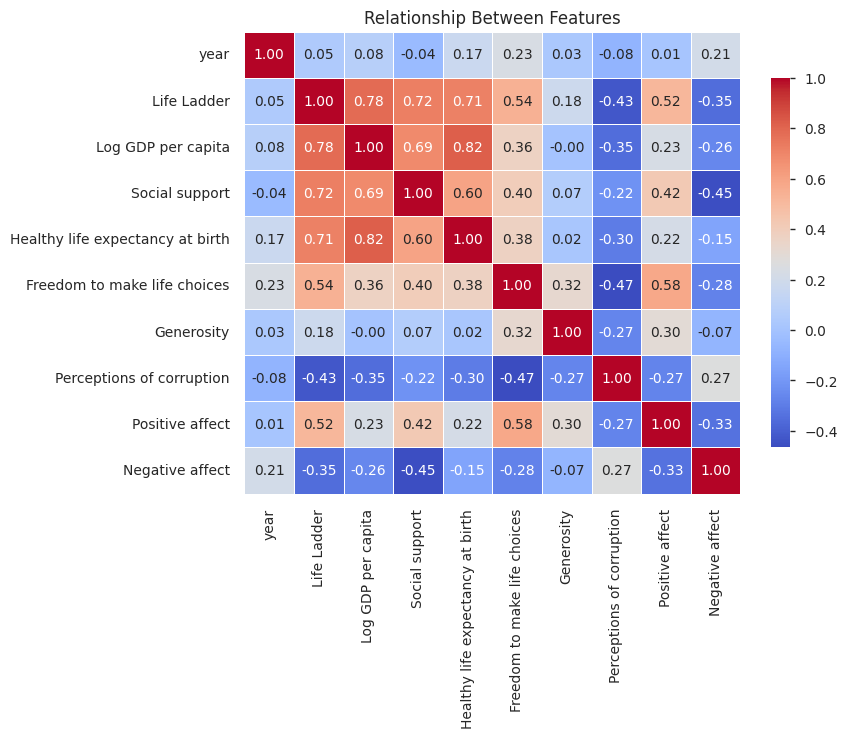

In [69]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include='number')

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size for better visibility
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", linewidths=0.7, cmap='coolwarm', cbar_kws={'shrink': .8})

# Add a title to the heatmap
plt.title("Relationship Between Features")

# Display the plot
plt.show()


### Insights:

* Happiness (Life Ladder) is closely linked with economic factors like GDP per capita and social support. Countries with higher income levels and stronger social networks tend to be happier.

* Health also plays a significant role in happiness, as indicated by the strong correlation between healthy life expectancy and the Life Ladder.

* Freedom to make life choices positively impacts happiness, while perceptions of corruption negatively affect it, showing that trust in institutions is important for societal well-being.

* Negative emotions (Negative Affect) have an expected inverse relationship with happiness, highlighting the importance of mental and emotional well-being.

Overall, economic prosperity, health, social support, and freedom are key contributors to happiness, while corruption and negative emotions detract from it.

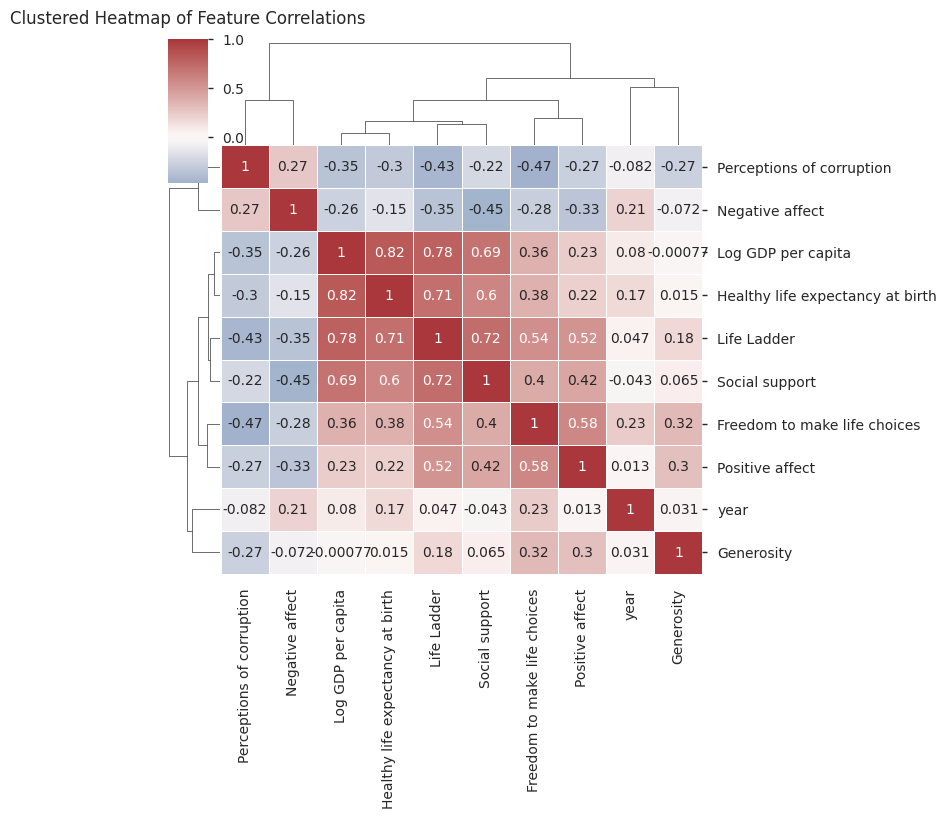

In [72]:
# Filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include='number')

# Generate a clustered heatmap with the numeric data only
sns.clustermap(numeric_df.corr(), 
               center=0, 
               cmap="vlag",  # Use a diverging colormap to highlight positive and negative correlations
               dendrogram_ratio=(0.1, 0.2),  # Adjust the size of the dendrograms
               annot=True,  # Display correlation values on the heatmap
               linewidths=0.7,  # Set line width between cells for clarity
               figsize=(8, 8))  # Set the figure size

plt.title("Clustered Heatmap of Feature Correlations", y=1.05)  # Add a title with some vertical spacing
plt.show()


### Insights: 

The clustered heatmap shows that economic factors like GDP per capita and life expectancy are strongly related to overall life satisfaction. Positive social factors like social support and freedom of choice also play significant roles. Conversely, corruption negatively impacts happiness and economic well-being. The clustering of these features highlights their interconnectedness in influencing life quality across countries.

## Conclusion:

In our analysis, we explored the intricate relationships between various factors that influence life satisfaction and well-being across different countries and regions. Through visualizations such as scatter plots, heatmaps, and clustered heatmaps, we observed how economic indicators like GDP per capita, social factors such as freedom and social support, and negative influences like corruption and negative affect interact to shape the happiness of populations worldwide.

Key insights include:
- **Economic Prosperity**: Countries with higher GDP per capita and life expectancy generally report higher life satisfaction.
- **Social Support and Freedom**: Regions with stronger social support networks and greater freedom to make life choices exhibit higher happiness levels.
- **Impact of Corruption**: High perceptions of corruption are consistently associated with lower life satisfaction, indicating the importance of governance in well-being.
- **Regional Differences**: Distinct patterns emerge across regions, highlighting how cultural, economic, and political contexts shape the factors contributing to happiness.

Overall, the data underscores the complexity of well-being, revealing that economic and social factors are deeply interconnected and must be addressed holistically to improve life satisfaction globally.